In [1]:
!pip install tensorflow-addons
!pip install tensorflow
!pip install keras


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 612.1/612.1 kB 7.8 MB/s eta 0:00:00


Saving IMG_20210904_045039.jpg to IMG_20210904_045039.jpg


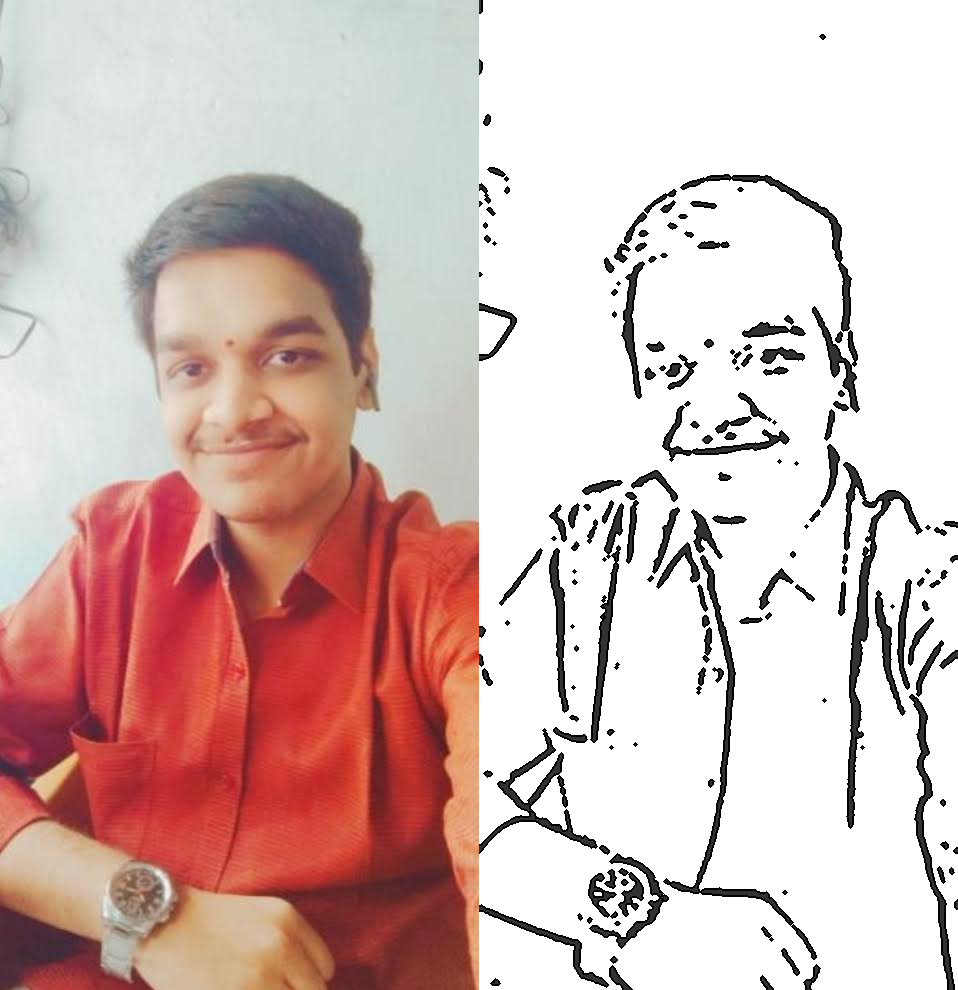

In [2]:
import cv2
import numpy as np
from google.colab import files
from google.colab.patches import cv2_imshow

def upload_image():
    uploaded = files.upload()
    if len(uploaded) > 0:
        image_data = next(iter(uploaded.values()))
        image = cv2.imdecode(np.frombuffer(image_data, np.uint8), cv2.IMREAD_COLOR)
        return image
    else:
        return None

def main():
    # Upload the image
    image = upload_image()

    if image is None:
        print("No image uploaded.")
    else:
        # Convert the image to grayscale
        grayscale_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

        # Apply bilateral filtering to enhance edges while removing noise
        filtered_image = cv2.bilateralFilter(grayscale_image, d=9, sigmaColor=75, sigmaSpace=75)

        # Apply adaptive thresholding to create a binary image
        threshold_image = cv2.adaptiveThreshold(filtered_image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                                cv2.THRESH_BINARY_INV, 11, 2)

        # Apply erosion to eliminate small dots
        kernel = np.ones((3, 3), np.uint8)
        eroded_image = cv2.erode(threshold_image, kernel, iterations=1)

        # Find the contours in the eroded image
        contours, _ = cv2.findContours(eroded_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

        # Create a blank white image with the same size as the original image
        sketch_image = np.ones_like(image) * 255

        # Draw each contour on the blank image with black color (0) and thicker lines (3)
        for contour in contours:
            cv2.drawContours(sketch_image, [contour], -1, (0), 3)

        # Create a mask to isolate the eye globe area
        if len(contours) > 0:
            mask = np.zeros_like(grayscale_image)
            cv2.drawContours(mask, contours, -1, 255, thickness=cv2.FILLED)

            # Change the eye globe area to dim black using the mask
            sketch_image[mask == 255] = 50  # Change the intensity value here

        # Combine the uploaded image and the sketch output side by side
        combined_image = np.hstack((image, sketch_image))

        # Display the combined image
        cv2_imshow(combined_image)

if __name__ == "__main__":
    main()
